# Flight fare Prediction

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data=pd.read_csv('Flight_Fare.csv')

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Domain Analysis

In [4]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data['Duration']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

# Exploratory Data Analysis

## Univariate Analysis

In [7]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

C:\Users\admin\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\admin\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

C:\Users\admin\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\admin\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\admin\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\admin\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\admin\anaconda3\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is depr

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Insights:

## Bivariate Analysis:

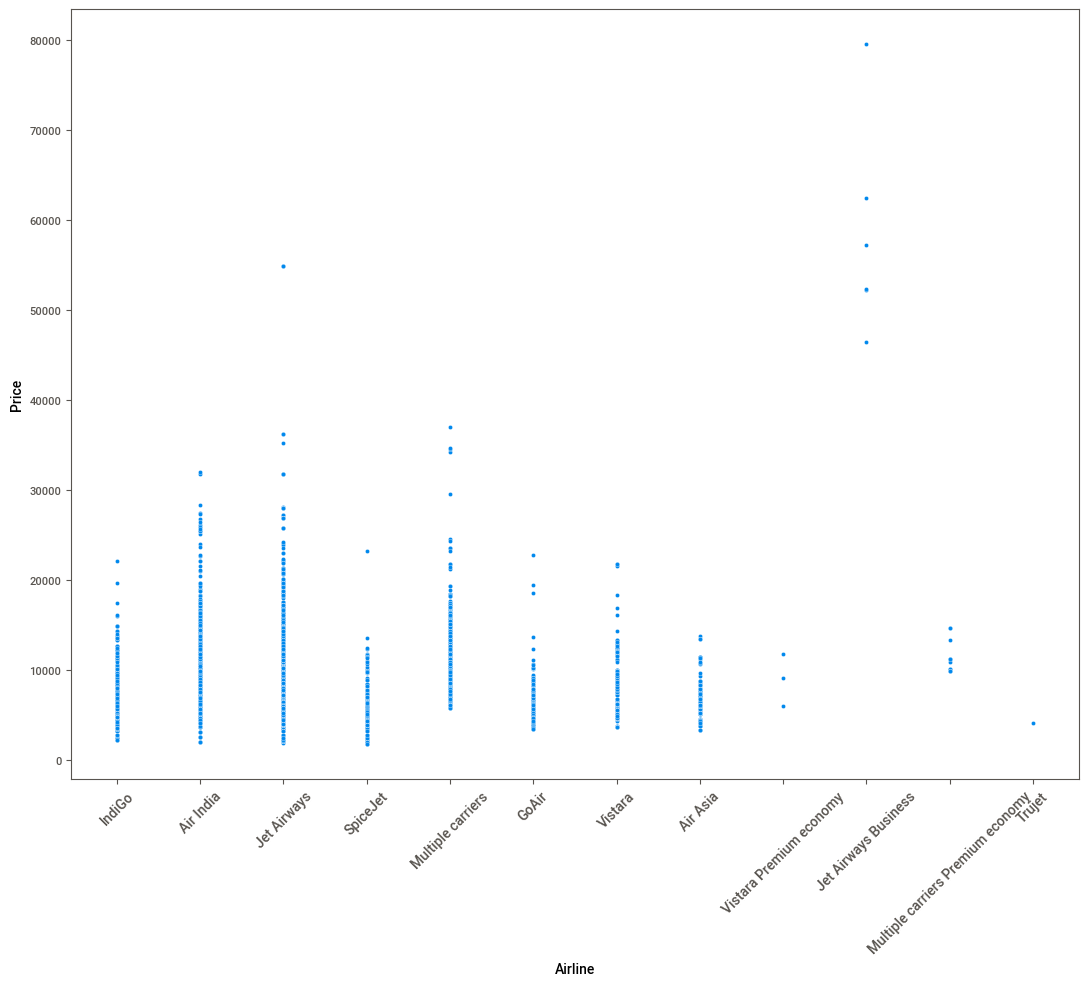

In [8]:
plt.figure(figsize=(13,10))
sns.scatterplot(x='Airline',y='Price',data=data)
plt.xticks(fontsize=10,rotation=45)
plt.show()

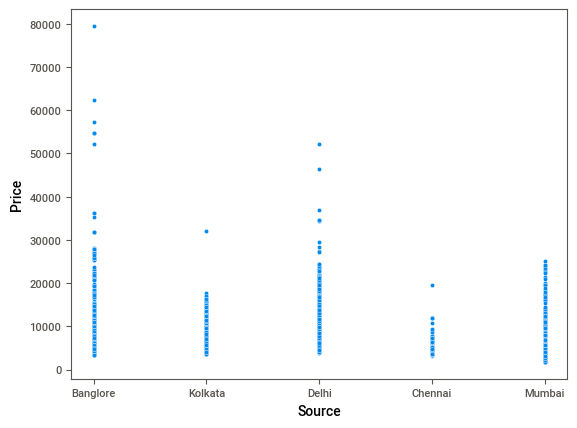

In [9]:
sns.scatterplot(x='Source',y='Price',data=data)
plt.show()

People travelling from Bangalore has the highest ticket fare.

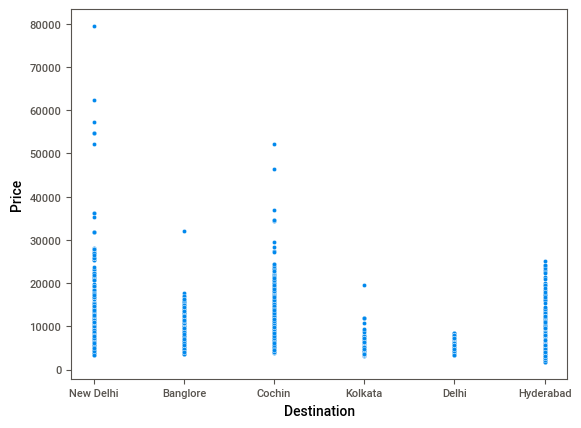

In [10]:
sns.scatterplot(x='Destination',y='Price',data=data)
plt.show()

People travelling to New Delhi has higher ticket fare.

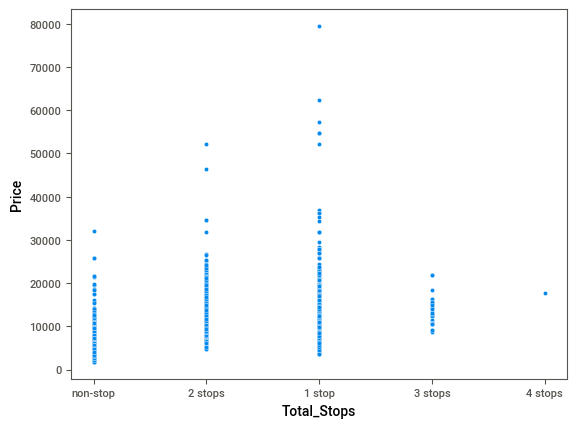

In [11]:
sns.scatterplot(x='Total_Stops',y='Price',data=data)
plt.show()

The price for 1 stop is maximum and most the people are comfortable to travel in flight having 1 stops

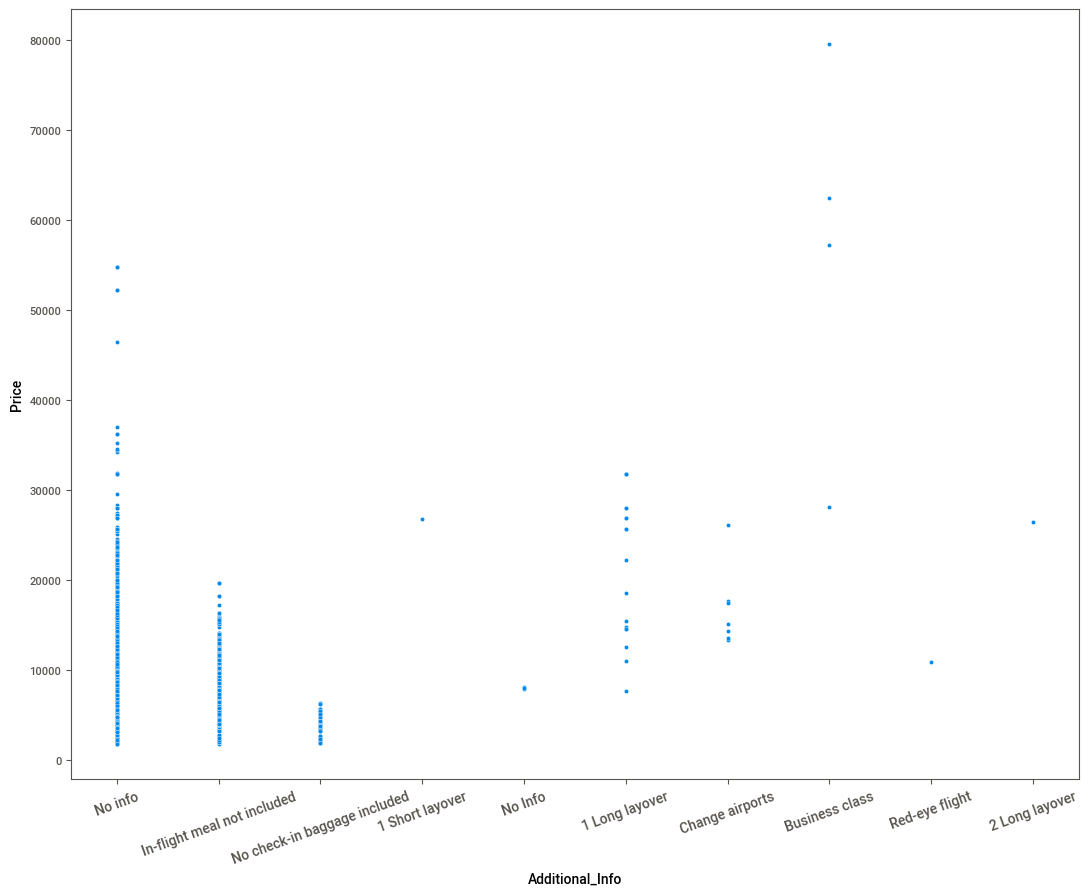

In [12]:
plt.figure(figsize=(13,10))
sns.scatterplot(x='Additional_Info',y='Price',data=data)
plt.xticks(fontsize=10,rotation=20)
plt.show()

Business class has the highest fare.

# Data Preprocessing

### Checking null values

In [13]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
data.dropna(inplace=True)

In [15]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


In [16]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [17]:
data['Journey_Day']=data['Date_of_Journey'].str.split('/').str[0].astype(int)

In [18]:
data['Journey_Month']=data['Date_of_Journey'].str.split('/').str[1].astype(int)


In [19]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3


In [20]:
data.drop(['Date_of_Journey','Route'],axis=1,inplace=True)

In [21]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,445,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,325,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,285,1 stop,No info,13302,1,3


In [22]:
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

In [23]:
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour
data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute

In [24]:
data.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [25]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,No info,13302,1,3,16,50,21,35


### Encoding

In [26]:
data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [27]:
data.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [28]:
data.Airline=data.Airline.map({'Jet Airways':11,'IndiGo':10, 'Air India':9, 'Multiple carriers':8, 'SpiceJet':7, 'Vistara':6,'Air Asia':5,'GoAir':4,'Multiple carriers Premium economy':3,'Jet Airways Business':2,'Vistara Premium economy':1,'Trujet':0})

In [29]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,10,Banglore,New Delhi,170,non-stop,No info,3897,24,3,22,20,1,10
1,9,Kolkata,Banglore,445,2 stops,No info,7662,1,5,5,50,13,15
2,11,Delhi,Cochin,1140,2 stops,No info,13882,9,6,9,25,4,25
3,10,Kolkata,Banglore,325,1 stop,No info,6218,12,5,18,5,23,30
4,10,Banglore,New Delhi,285,1 stop,No info,13302,1,3,16,50,21,35


In [30]:
data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [31]:
data.Source=data.Source.map({'Delhi':4,'Kolkata':3, 'Banglore':2, 'Mumbai':1, 'Chennai':0})

In [32]:
data.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [33]:
data.Destination=data.Destination.map({'Cochin':5,'Delhi':4, 'Banglore':3, 'Hyderabad':2, 'Kolkata':1,'New Delhi':0})

In [34]:
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
data.Total_Stops=data.Total_Stops.map({'1 stop':4,'non-stop':3, '2 stops':2, '3 stops':1, '4 stops':0})

In [36]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,10,2,0,170,3,No info,3897,24,3,22,20,1,10
1,9,3,3,445,2,No info,7662,1,5,5,50,13,15
2,11,4,5,1140,2,No info,13882,9,6,9,25,4,25
3,10,3,3,325,4,No info,6218,12,5,18,5,23,30
4,10,2,0,285,4,No info,13302,1,3,16,50,21,35


In [37]:
data.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [38]:
data.Additional_Info=data.Additional_Info.map({'No info':8,'No Info':8,'In-flight meal not included':7,'No check-in baggage included':6,'1 Long layover':5,'Change airports':4,'Business class':3,'1 Short layover':2,'Red-eye flight':1,'2 Long layover':0})

In [39]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
dtype: int64

# Feature Selection

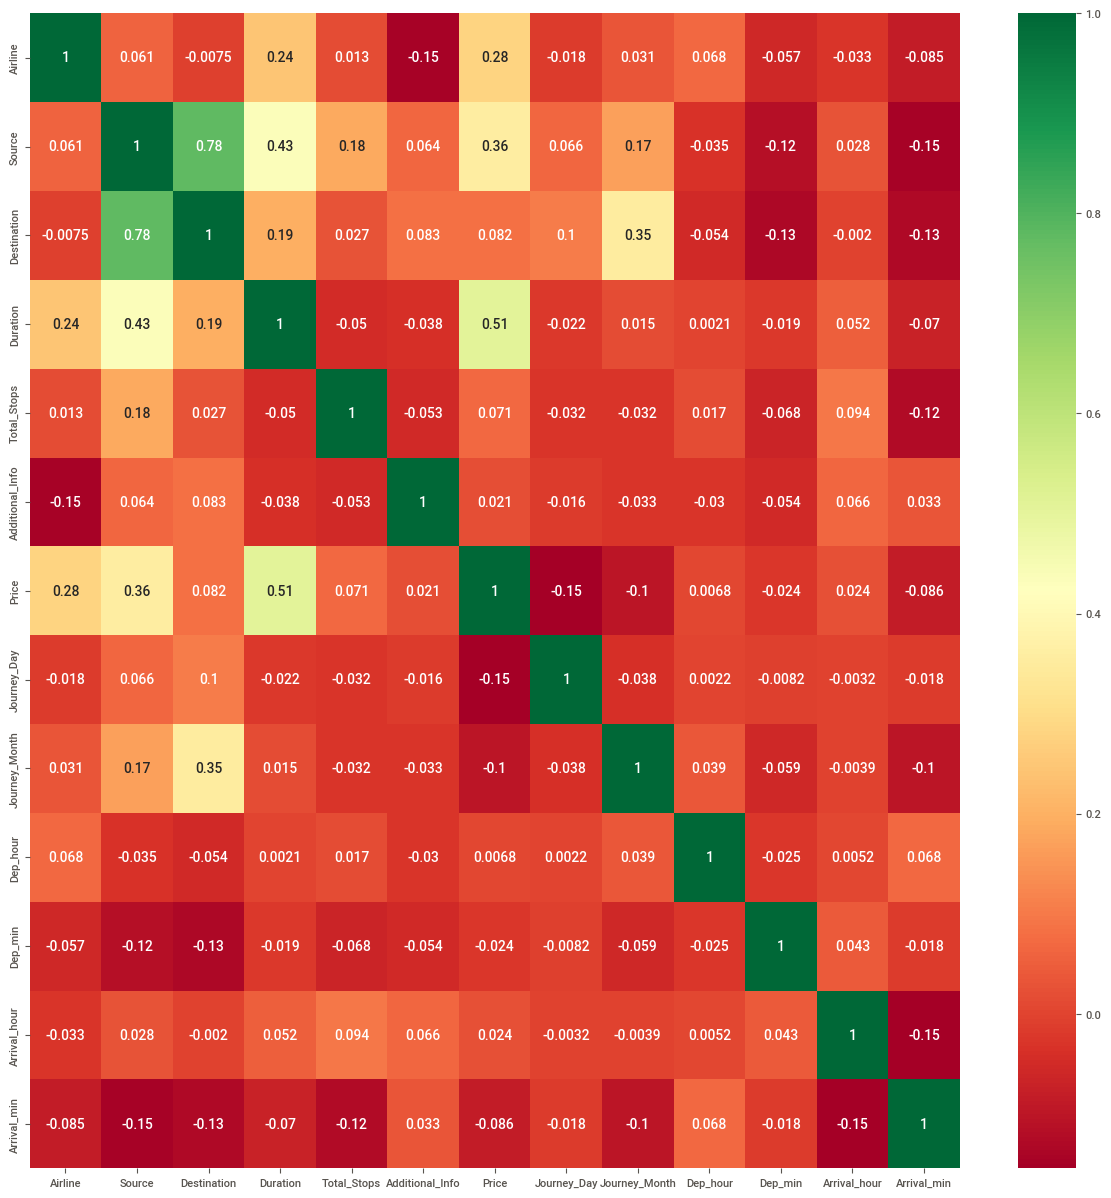

In [40]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

# Model Creation

In [41]:
X = data.drop('Price', axis=1) 
y = data.Price

In [42]:
X.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,10,2,0,170,3,8,24,3,22,20,1,10
1,9,3,3,445,2,8,1,5,5,50,13,15
2,11,4,5,1140,2,8,9,6,9,25,4,25
3,10,3,3,325,4,8,12,5,18,5,23,30
4,10,2,0,285,4,8,1,3,16,50,21,35


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Linear Regression`

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression() 
LR.fit(X_train,y_train) 
y_predict=LR.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [ ]:
r2score

### Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
y_pred = reg_rf.predict(X_test)

In [47]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [48]:
r2_score(y_test, y_pred)

0.8915799328167444

# Conclusion

# Challenges faced